# Cardio Good Fitness Project  ---- Solution

### Sanity Checks
**Importing necessary libraries**

In [93]:
# Libraries to be used for data reading and manipulation
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

**Importing the dataset**

In [94]:
df = pd.read_csv('CardioGoodFitness.csv')

**View the first and last 5 rows of the dataset**

In [95]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [96]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


**Understand the shape of the dataset**

In [97]:
# checking shape of the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 180 rows and 9 columns.


**Check the data types of the columns for the dataset**

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* The `Product`, `Gender` and `MaritalStatus` are categorical columns while the rest are all numerical columns.

**Statistical summary of numerical data**

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.000,28.789,6.943,18.000,24.000,26.000,33.000,50.000
Education,180.000,15.572,1.617,12.000,14.000,16.000,16.000,21.000
Usage,180.000,3.456,1.085,2.000,3.000,3.000,4.000,7.000
Fitness,180.000,3.311,0.959,1.000,3.000,3.000,4.000,5.000
Income,180.000,53719.578,16506.684,29562.000,44058.750,50596.500,58668.000,104581.000
Miles,180.000,103.194,51.864,21.000,66.000,94.000,114.750,360.000


* `Age`: Overall the customers age range from 18 to 50 years. The average age of the customers is 29 years. 75% of the customers have age less than or equal to 33 years. The distribution is right skewed as mean is right of the median.

* `Education`: The number of education years range from 12 to 21. The average #years of education is 15.572. Half of the customers have education that lie between 14 to 16 years.
* `Usage`: On average, the customer wants to use treadmill 3 times per week. Half of the customers use treadmill between 3 to 4 times per week. The distribution is skewed towards right as mean is right of the median.
* `Fitness`: On average, the fitness level is 3. 75% of the customers have fitness level <= 4.0. 
* `Income`: On average the customer income is 53720 and the median is 50597. The distribution is skewed towards right as mean is right of the median. 50% of the income values lie between 44060 and 58668. The column has a large standard deviation of 16507. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.
* `Miles`: 50% of the Miles values lie around between 65 to 115. Alomst half of customers expect to run less than or equal to 94 miles. The distribution is skewed towards right as mean is ahead of the median. The column has a large standard deviation of 52 miles. There is a huge difference between the maximum value and the 75% percentile of the data which indicates there might be outliers present in this column.


**Checking for missing values in the data**

In [100]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* No missing values for each of the column.

**Checking for duplicate entries in the data**

In [101]:
df.duplicated().sum()

0

* No duplicated enteries in the data.

### Univariate Analysis
**Check the distribution for numerical columns**

**Observations on Age**

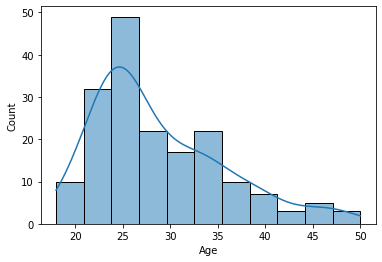

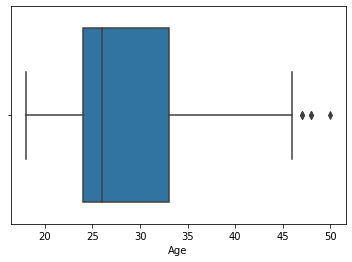

In [102]:
sns.histplot(data=df,x='Age', kde=True)
plt.show()
sns.boxplot(data=df,x='Age')
plt.show()

* The distribution is skewed towards right.
* There are a few outliers present in this column. 
* Values above 46 years are being represented as outliers in the boxplot.
* Almost half of the customers are of age 26 years or less.

In [103]:
print('There are', df.loc[df['Age']>46].shape[0], 'customers that are above 46 years age.')

There are 5 customers that are above 46 years age.


**Observations on Education**

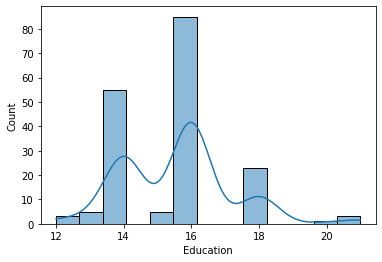

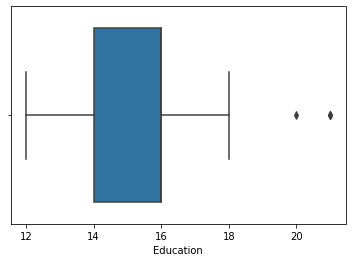

In [104]:
sns.histplot(data=df,x='Education', kde=True)
plt.show()
sns.boxplot(data=df,x='Education')
plt.show()

* The distribution is multimodal.
* Half of the customers have education that lie between 14 to 16 years.
* There are a few outliers who have 20 or more years of education.

**Observations on Usage**

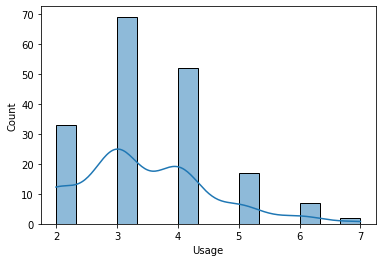

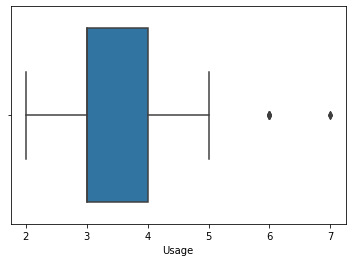

In [105]:
sns.histplot(data=df,x='Usage', kde=True)
plt.show()
sns.boxplot(data=df,x='Usage')
plt.show()

* The distribution is skewed towards right.
* Half of the customers want to use treadmill between 3 to 4 times a week.
* Almost 50% of the customers will use treadmill 3 times or less a week.
* There are a few outliers present in this column who will use treadmill 6 or 7 times a week.


In [106]:
print('There are', df.loc[df['Usage']>5].shape[0], 'customers who use treadmill 6 or 7 times a week.')

There are 9 customers who use treadmill 6 or 7 times a week.


**Observations on Fitness**

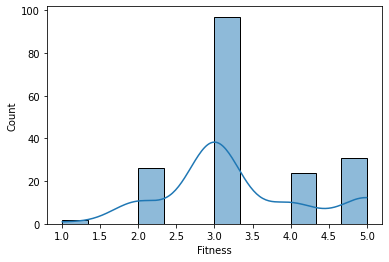

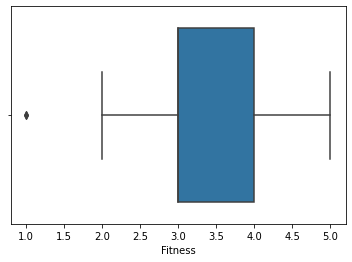

In [107]:
sns.histplot(data=df,x='Fitness', kde=True)
plt.show()
sns.boxplot(data=df,x='Fitness')
plt.show()

* 50% of the fitness level values lie between 3 and 4
* Almost half of the customers have fitness level 3 or less.
* There are a few outliers whose fitness level is less than 2 i.e. they are very unfit.

In [108]:
print('There are', df.loc[df['Fitness']>4].shape[0], 'customers who are very fit i.e. with fitness level 5.')

There are 31 customers who are very fit i.e. with fitness level 5.


In [109]:
print('There are', df.loc[df['Fitness']<2].shape[0], 'customers who are very unfit i.e. with fitness level 1.')

There are 2 customers who are very unfit i.e. with fitness level 1.


**Observations on Income**

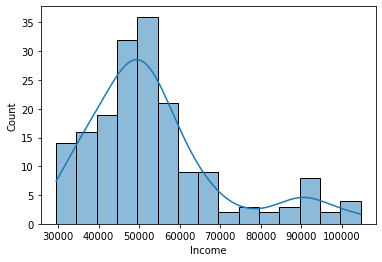

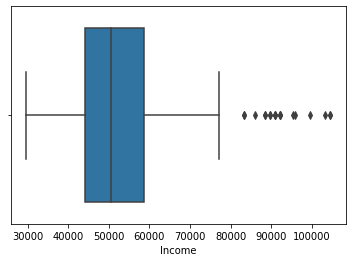

In [110]:
sns.histplot(data=df,x='Income', kde=True)
plt.show()
sns.boxplot(data=df,x='Income')
plt.show()

* The distribution is skewed towrads right.
* 50% of the Income values lie around between 44000 to 59000.
* Alomst half of customers have Income less than or equal to 50000.
* There seem to be a lot of outlier present in this column which indicates that there are quite a few customers who have income higher than 80000.

In [111]:
print('There are', df.loc[df['Income']>80000].shape[0], 'customer who have income level above 80000.')

There are 19 customer who have income level above 80000.


**Observations on Miles**

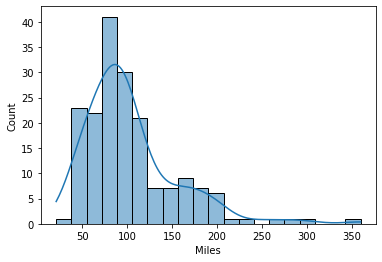

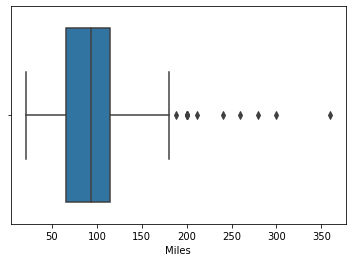

In [112]:
sns.histplot(data=df,x='Miles', kde=True)
plt.show()
sns.boxplot(data=df,x='Miles')
plt.show()

* The distribution is skewed towrads right.
* 50% of the Miles values lie around between 65 to 115.
* Alomst half of customers expect to run less than or equal to 95 miles.
* There seem to be a lot of outlier present in this column which indicates that there are quite a few customers who expect to run more than 190 miles.

In [113]:
print('There are', df.loc[df['Miles']>190].shape[0], 'customer who expect to run more than 190 miles.')

There are 12 customer who expect to run more than 190 miles.


**Check the distribution for categorical columns**

**Observations on Product**

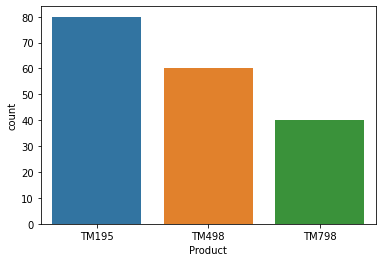

In [114]:
sns.countplot(data=df,x='Product')
plt.show()

* There are 80 treadmills of model TM195, 60 of model TM498 and 40 of model TM798 in use by the customers.

**Observations on MaritalStatus**

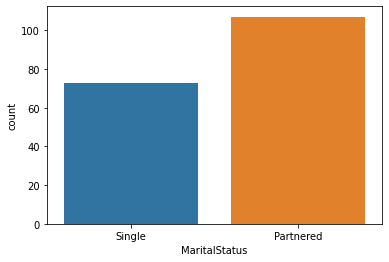

In [115]:
sns.countplot(data=df,x='MaritalStatus');

* There are around 70 customers whose `MaritalStatus` is 'Single' while the remaining 110 are 'Partnered'.

**Observations on Gender**

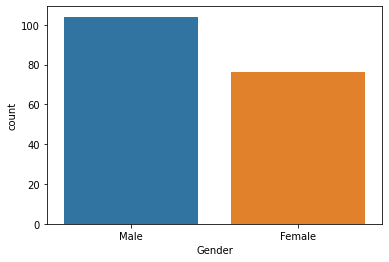

In [116]:
sns.countplot(data=df,x='Gender');

* There are around 105 male customers and around 75 female customers.

### Multivariate Analysis

**Heatmap to see the correlation between numerical columns**

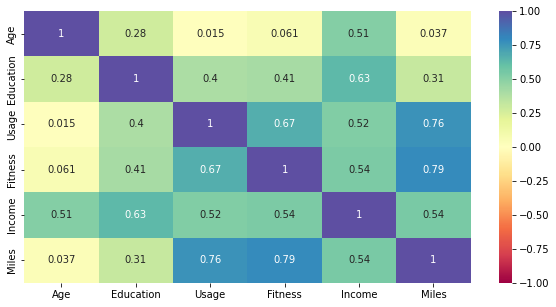

In [117]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Observations**
* Miles column show a high correlation with Usage and Fitness level. This is expected since Fitness and Usage are also highly correlated. This indicates that customers with better fitness level expect to run more miles and therefore will have high treadmill usage. 
* Income column shows significant correlation with Fitness level. This indicates that customers who have better fitness have also higher income levels.
* Income column also shows significant correlation with Usage and Miles. This is expected since Fitness and Usage are also highly correlated. This indicates that customers who have better fitness have also higher income levels and also they expect to run more miles and use treadmill more often.
* Income column also shows significant correlation with Education and Age. This indicates that customers with more education and age have also higher income levels. This is an expected outcome.
* Education column shows a moderate correlation with Fitness, Usage and Miles. This indicates that customers with higher education are more conscious about health and fitness and so may run more miles and have higher treadmill usage.
* There are no features with negative correlation.



**Relationship between Fitness and Miles**

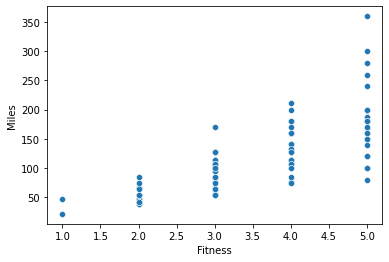

In [118]:
sns.scatterplot(data=df, x='Fitness', y='Miles');

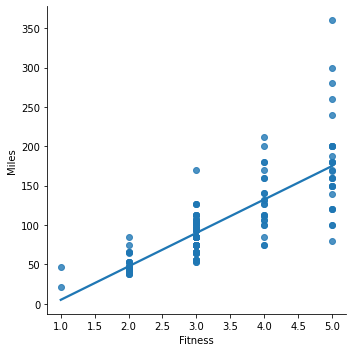

In [119]:
sns.lmplot(data=df, x='Fitness', y='Miles',ci=False);

* From all the above graphs, it can be clearly seen that there is a linear relationship between `Fitness` and `Miles` i.e the customer with higher fitness expects to run more miles and vice versa.

**Relationship between Usage, Fitness and Miles**

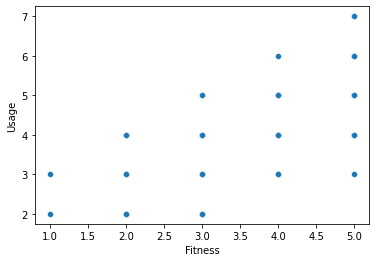

In [120]:
sns.scatterplot(data=df, y='Usage', x='Fitness');

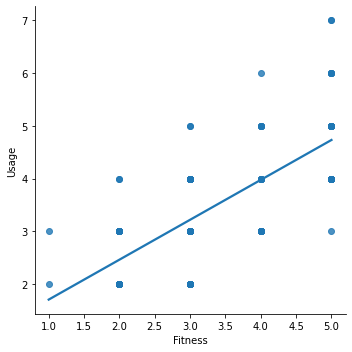

In [121]:
sns.lmplot(data=df, y='Usage', x='Fitness',ci=False);

* From all the above graphs, it can be clearly seen that there is a linear relationship between `Fitness` and `Usage` i.e the customer with higher fitness will have higher treadmill usage and vice versa.

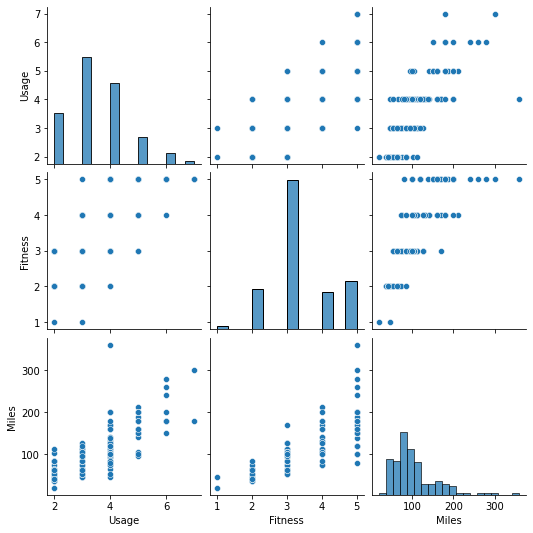

In [122]:
sns.pairplot(data = df[['Usage','Fitness','Miles']]);

* From the above graphs, it can be clearly seen that `Miles`, `Usage` and `Fitness` are highly correlated.  This indicates that customers with better fitness level expect to run more miles and therefore will have high treadmill usage. 

**Relationship between Fitness and Income**

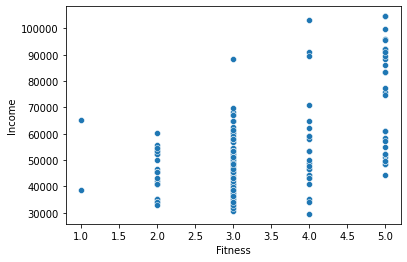

In [123]:
sns.scatterplot(data=df, x='Fitness', y='Income');

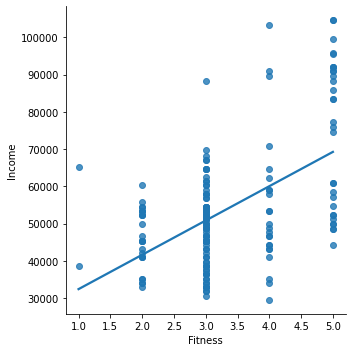

In [124]:
sns.lmplot(data=df, x='Fitness', y='Income', ci=True);

* From above graphs, it can be seen that `Income` column shows significant correlation with `Fitness` level. This indicates that customers who have better fitness have also higher income levels and vice versa.

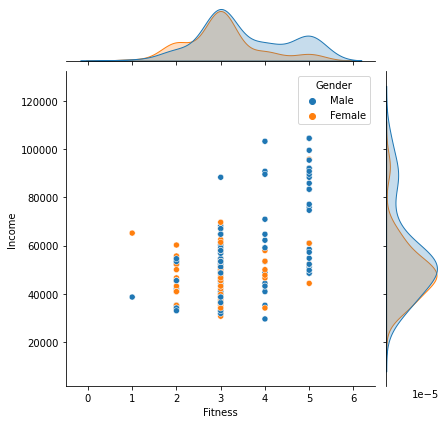

In [125]:
sns.jointplot(data=df, x='Fitness', y='Income', hue='Gender');

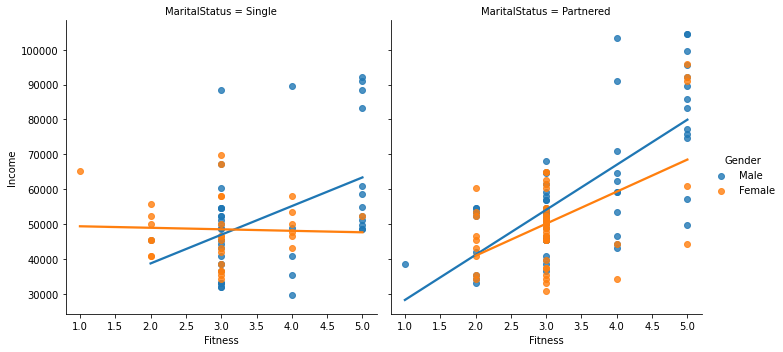

In [126]:
sns.lmplot(data=df, x='Fitness', y='Income', hue='Gender', col='MaritalStatus', ci=True);

* From the above plots, male and female customers both have positive correlation between fitness and Income. 
* Most of the customers that are very fit (i.e. fitness level 5) are males. This is very true for customers that are single where there is only one female.
* Most of the customers with income above 70000 are male.
* Most of the customers with high income have marital status as 'Partnered'.

**Relationship between numerical columns and categorical columns**

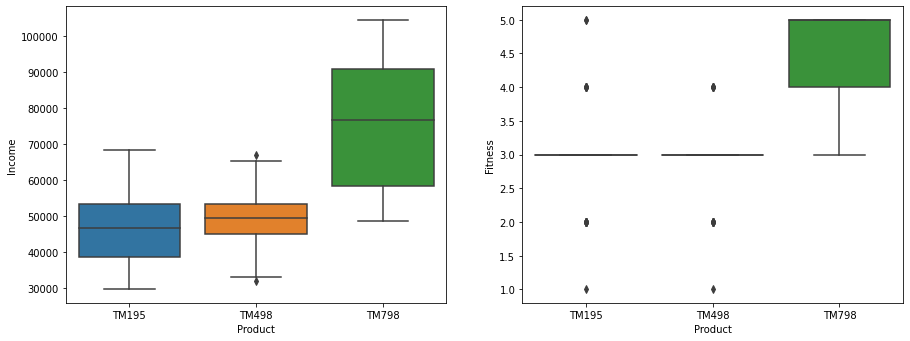

In [127]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='Product',y='Income')

plt.subplot(2,2,2)
sns.boxplot(data=df,x='Product',y='Fitness')
plt.show()

* The median income for customers that use product TM798 is very high compared to other two products.
* Mostly customers with fitness level 4 and above (i.e. very fit) use TM798 product.

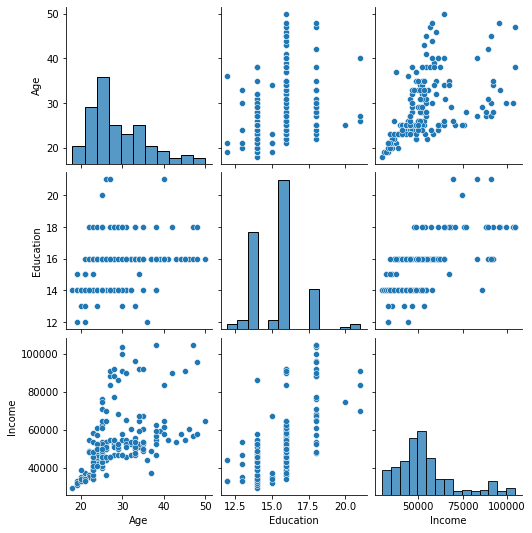

In [128]:
sns.pairplot(data=df, vars=['Age','Education','Income']);

* From above graphs, `Income` column shows significant correlation with `Education` and `Age`. This indicates that customers with more education and age have also higher income levels. This is an expected outcome.

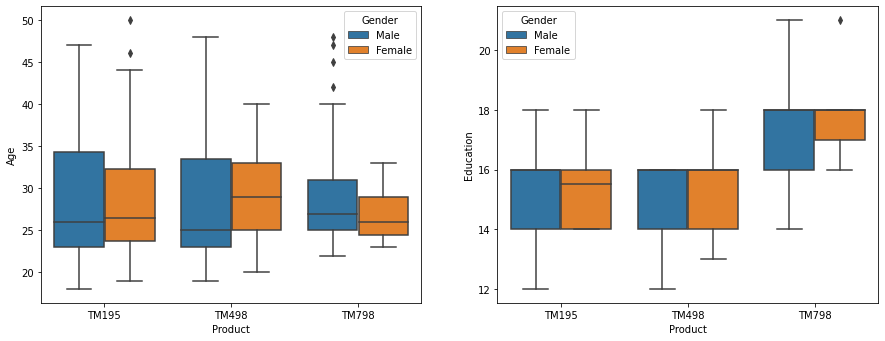

In [129]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
sns.boxplot(data=df,x='Product',y='Age',hue='Gender')

plt.subplot(2,2,2)
sns.boxplot(data=df,x='Product',y='Education', hue='Gender')
plt.show()

* The median age of the customers is more or less similar for all the products. But there are quite a few outliers for product TM798. 
* The median #years education is higher for customers that bought TM798 compared to other two products.

### Insights and Observations:
1. The number of customers for TM195 > TM498 > TM798. TM798 has least number of customers.
2. There are less customers whose marital status is single.
3. There are more male customers than female customers.
4. There is a linear relationship between Fitness and Miles i.e the customer with higher fitness expects to run more miles.
5. There is a linear relationship between Fitness and Usage i.e the customer with higher fitness will have higher treadmill usage and vice versa.
6.  Miles, Usage and Fitness columns are highly correlated. This indicates that customers with better fitness level expect to run more miles and therefore will have high treadmill usage.
7.  There is significant correlation between income and Fitness level. This indicates that customers who have better fitness have also higher income levels and vice versa.
9. Most of the customers that are very fit (i.e. fitness level 5) are males. This is very true for customers that are single where there is only one female.
10. Most of the customers with income above 70000 are male.
11. Most of the customers with high income have marital status as 'Partnered'.
12. The median income for customers that use product TM798 is very high compared to the other two products.
13. Mostly customers with fitness level 4 and above (i.e. very fit) use TM798 product.
14. The median #years education is higher for customers that bought TM798 compared to other two products.

### Recommendations:
1. The data analysis shows that there is a significant market still untapped for ages above 35 years. The store should focus targeting this age group which can help improve their customer base.
2. The dataset shows Product TM798 is popular among people who are very fit. So if the store can target new customers who are already fit and want to take their fitness to next level, it can help improve store's sales for TM798.
3. From data analysis, it can be seen that TM798 is popular among high level income customers. Since Income level is highly correlated with Age, Education and marital status, the store can target customers with higher education, relatively older age group and with marital status as partnered to help improve the sales for TM798.
4. The store can help improve its customer base by targeting the female market and also new single customers from either gender.